In [1]:
from importlib import reload

In [2]:
import numpy as np
import strategies as s
from strategies import ts_sim, ac_sim
from strategies import estimate, compare
from strategies import car_rotation, spaceship_rotation

In [3]:
start_speed = 1.0
acceleration = 2.0
distance = 10.0
start_angle = 0.1

speed = np.array([np.cos(0.1), np.sin(0.1)]) * start_speed

In [4]:
ROT_CONST = 0.9
cr = lambda sp: car_rotation(sp, ROT_CONST)
sr = lambda sp: spaceship_rotation(sp, ROT_CONST)
cr(speed)

0.9

In [5]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 7]
font = {'family' : 'serif',
        'size'   : 22}
plt.rc('font', **font)

In [6]:
N = 10
xs = np.linspace(0.1, 6.0, N)

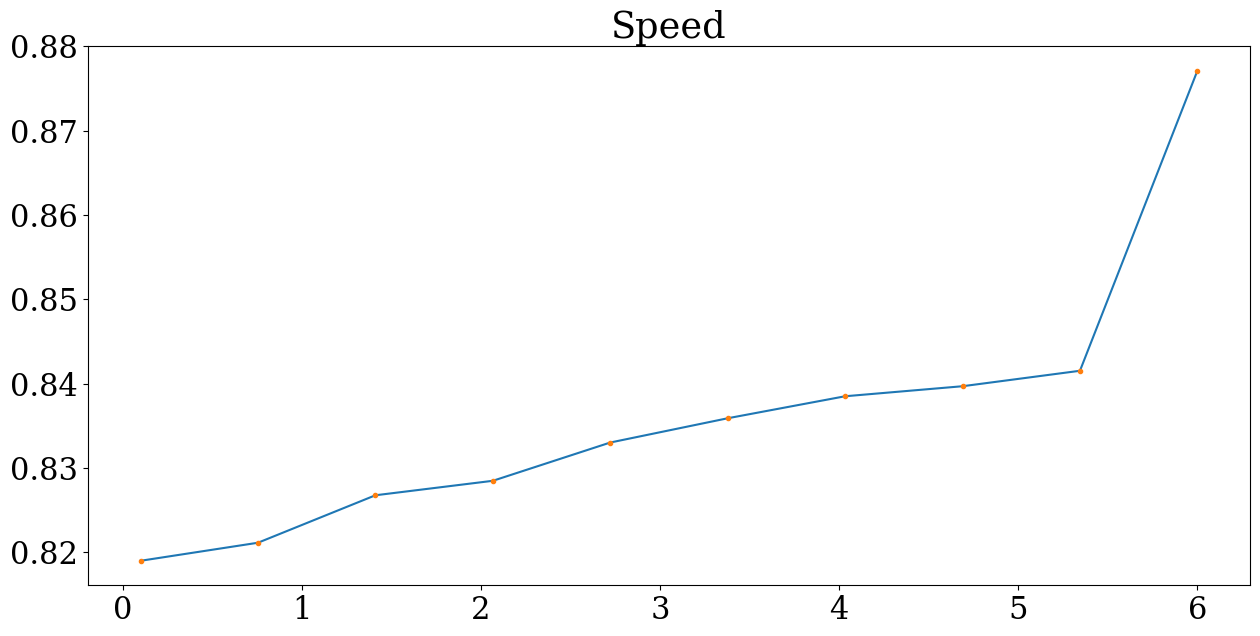

In [7]:
g = []
for start_speed_2 in xs * start_speed:
    x, y = compare(start_speed_2, acceleration, start_angle, distance, [ts_sim, ac_sim], rotation=cr)
    g.append(y / x)

plt.title('Speed')
plt.plot(xs, g, label = "Acceleration time / Turn time")
plt.plot(xs, g, '.')
plt.show()

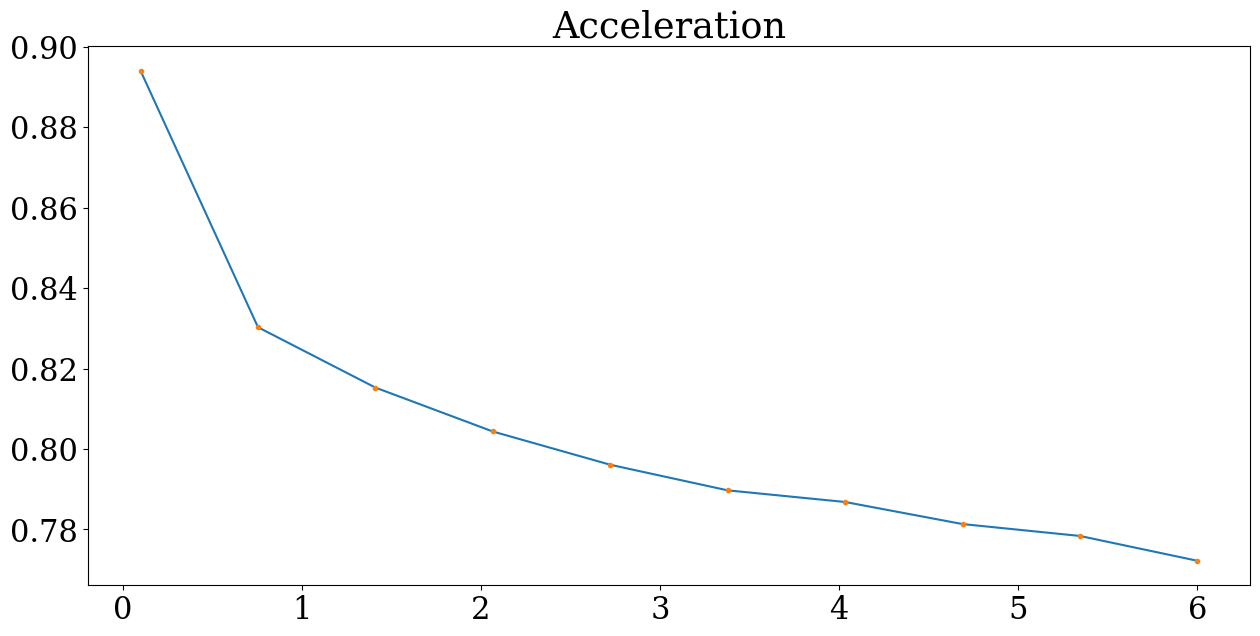

In [8]:
g = []
for acceleration_2 in xs * acceleration:
    x, y = compare(start_speed, acceleration_2, start_angle, distance, [ts_sim, ac_sim], rotation=cr)
    g.append(y / x)

plt.title('Acceleration')
plt.plot(xs, g, label = "Acceleration time / Turn time")
plt.plot(xs, g, '.')
plt.show()

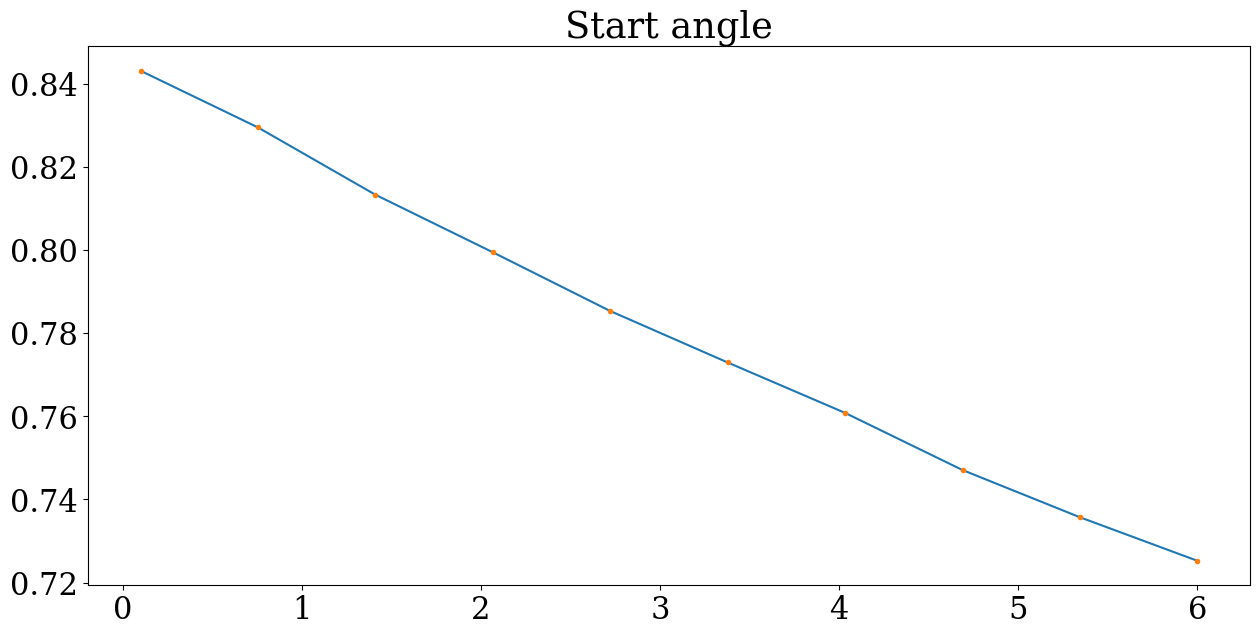

In [9]:
g = []
for start_angle_2 in xs * start_angle:
    x, y = compare(start_speed, acceleration, start_angle_2, distance, [ts_sim, ac_sim], rotation=cr)
    g.append(y / x)

plt.title('Start angle')
plt.plot(xs, g, label = "Acceleration time / Turn time")
plt.plot(xs, g, '.')
plt.show()

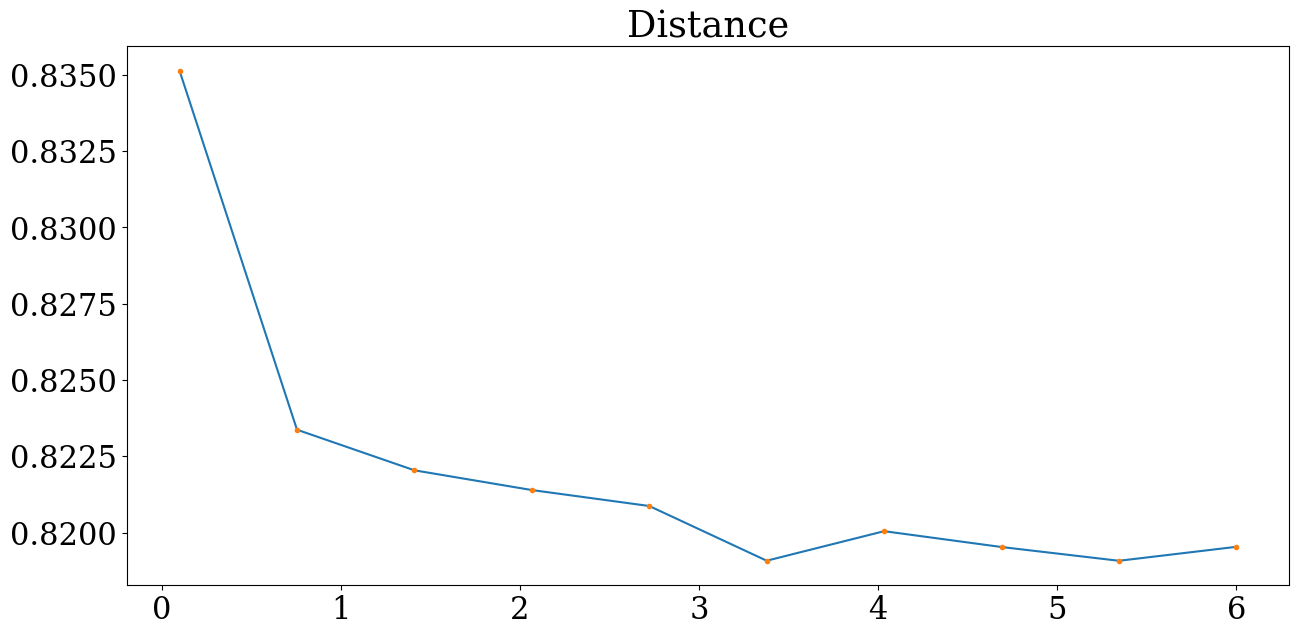

In [10]:
g = []
for distance_2 in xs * distance:
    x, y = compare(start_speed, acceleration, start_angle, distance_2, [ts_sim, ac_sim], rotation=cr)
    g.append(y / x)

plt.title('Distance')
plt.plot(xs, g, label = "Acceleration time / Turn time")
plt.plot(xs, g, '.')
plt.show()

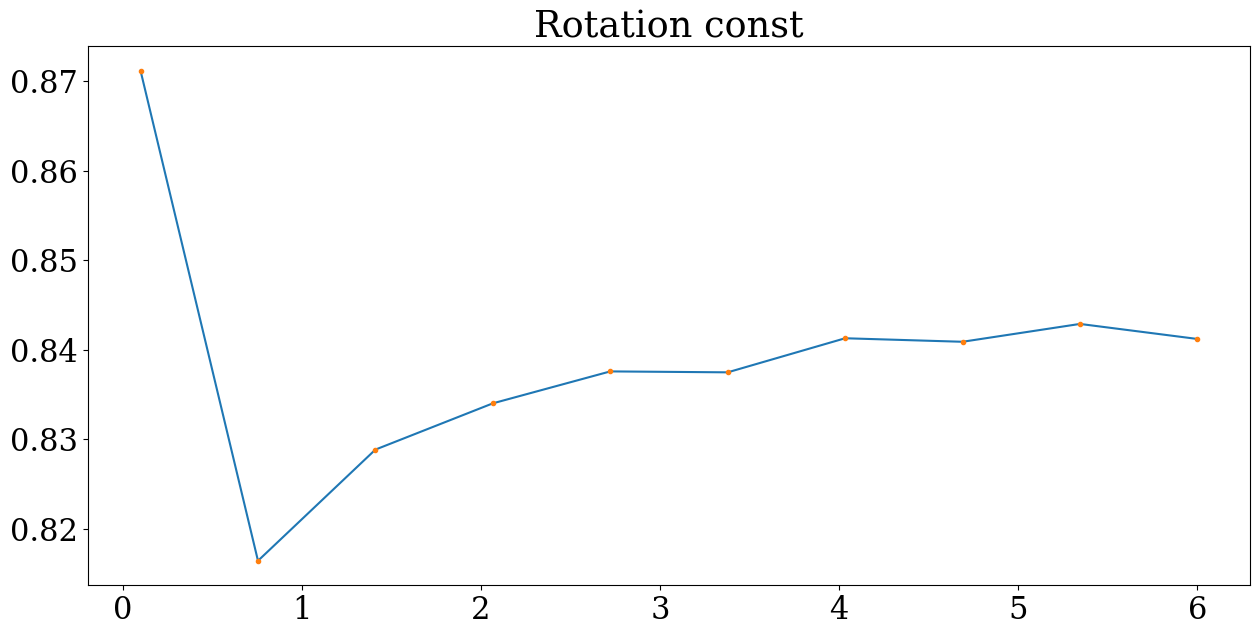

In [11]:
g = []
for rot_const_2 in xs * ROT_CONST:
    cr_2 = lambda sp: car_rotation(sp, rot_const_2)
    x, y = compare(start_speed, acceleration, start_angle, distance, [ts_sim, ac_sim], rotation=cr_2)
    g.append(y / x)

plt.title('Rotation const')
plt.plot(xs, g, label = "Acceleration time / Turn time")
plt.plot(xs, g, '.')
plt.show()